# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan dalam penelitian ini diperoleh dari platform Kaggle. Dataset yang digunakan berjudul “Home Value Insights”, yang dapat diakses secara bebas oleh pengguna.

2. **Deskripsi Dataset**:
   Dataset Home Value Insights merupakan dataset terstruktur yang berisi data karakteristik rumah dan lingkungannya sebanyak 1000 baris data. Dataset ini dirancang untuk menganalisis faktor-faktor yang memengaruhi harga rumah.

3. **Variabel dalam Dataset**
   Dataset terdiri dari beberapa variabel independen dan satu variabel target, yaitu:
   - Square_Footage: luas bangunan rumah
   - Num_Bedrooms: jumlah kamar tidur
   - Num_Bathrooms: jumlah kamar mandi
   - Lot_Size: luas lahan
   - Garage_Size: kapasitas garasi
   - Year_Built: tahun pembangunan rumah
   - Neighborhood_Quality: kualitas lingkungan sekitar rumah
   - House_Price: harga rumah (variabel target)

# **2. Import Library**

In [1]:
!pip install mlflow==2.19.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.7 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
import os
import sys
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [3]:
# version
print("Python version:", sys.version)
print("MLflow version:", mlflow.__version__)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
MLflow version: 2.19.0


# **3. Memuat Dataset**

In [4]:
# create folder
!mkdir -p Eksperimen_SML_Putri
!mkdir -p Eksperimen_SML_Putri/house_price_raw
!mkdir -p Eksperimen_SML_Putri/preprocessing
!mkdir -p Eksperimen_SML_Putri/preprocessing/house_price_preprocessing

In [5]:
# upload dataset
from google.colab import files
uploaded = files.upload()

!mv house_price_regression_dataset.csv Eksperimen_SML_Putri/house_price_raw


Saving house_price_regression_dataset.csv to house_price_regression_dataset.csv


In [6]:
# load dataset
target_path = 'Eksperimen_SML_Putri/house_price_raw/house_price_regression_dataset.csv'
df = pd.read_csv(target_path)
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [7]:
# notebook eksperimen
notebook_name = "Eksperimen_Putri.ipynb"
notebook_path = f"Eksperimen_SML_Putri/preprocessing/{notebook_name}"

notebook_content = {
  "cells": [
    {
      "cell_type": "markdown",
      "metadata": {},
      "source": ["# EKSPERIMEN DATASET HOUSE PRICE\nNama: Putri"]
    },
    {
      "cell_type": "code",
      "metadata": {},
      "source": [
        "# CELL 1: LOAD DATA\n",
        "import pandas as pd\n",
        "df = pd.read_csv('../house_price_raw/house_price_regression_dataset.csv')\n",
        "print('Data loaded!')\n",
        "print(df.shape)\n",
        "df.head()"
      ]
    }
  ],
  "metadata": {}
}

import json
with open(notebook_path, 'w') as f:
    json.dump(notebook_content, f)

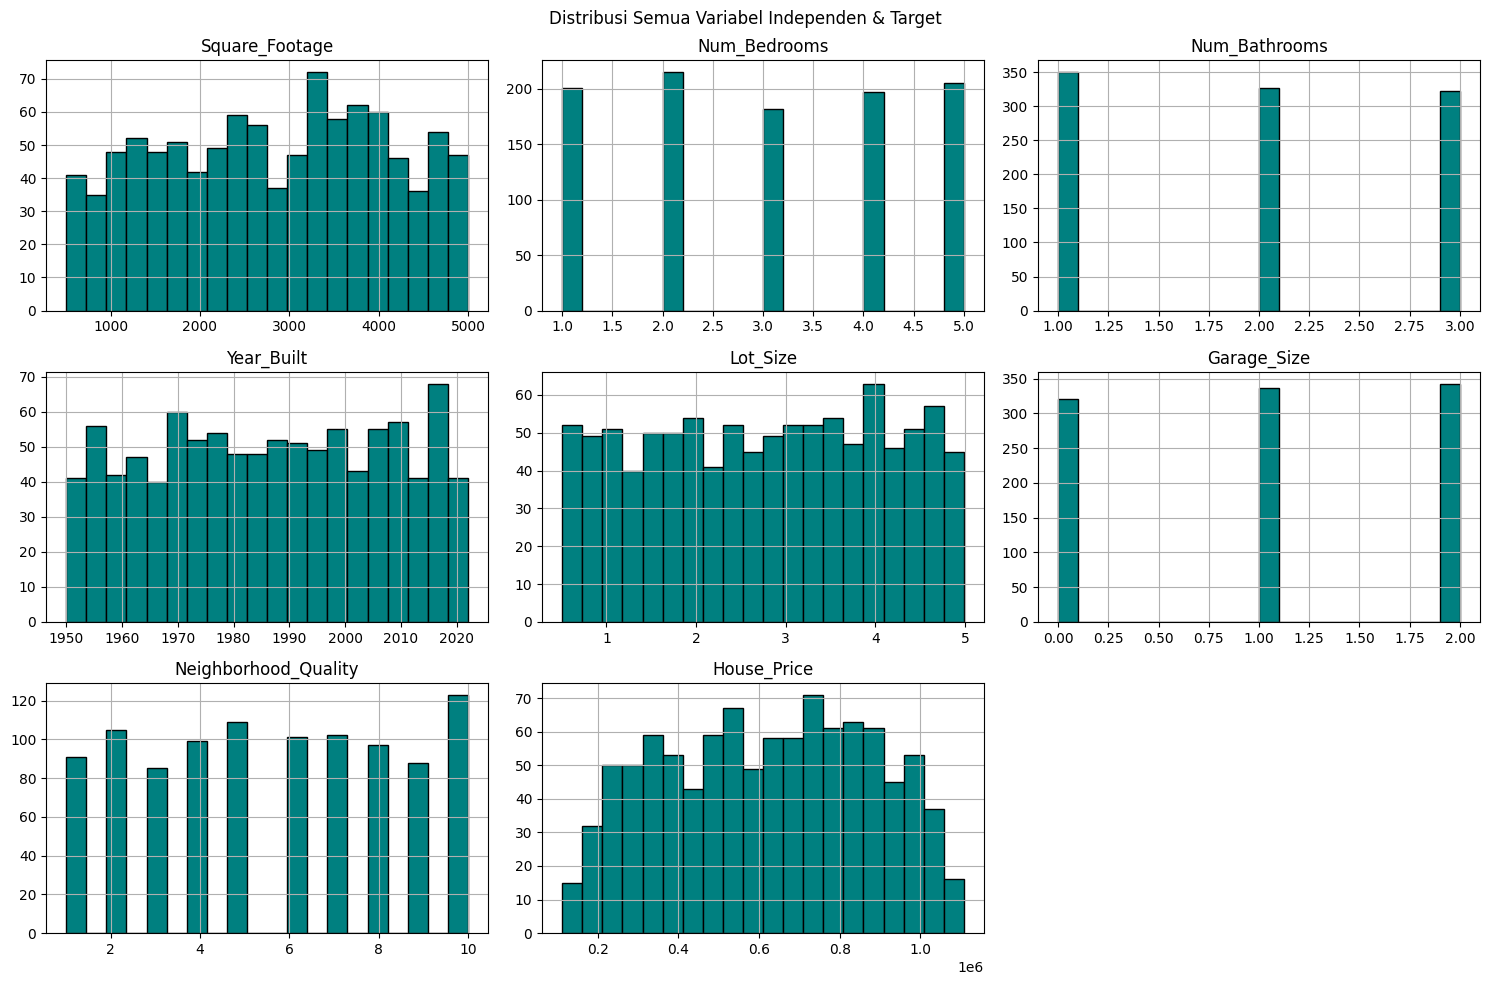

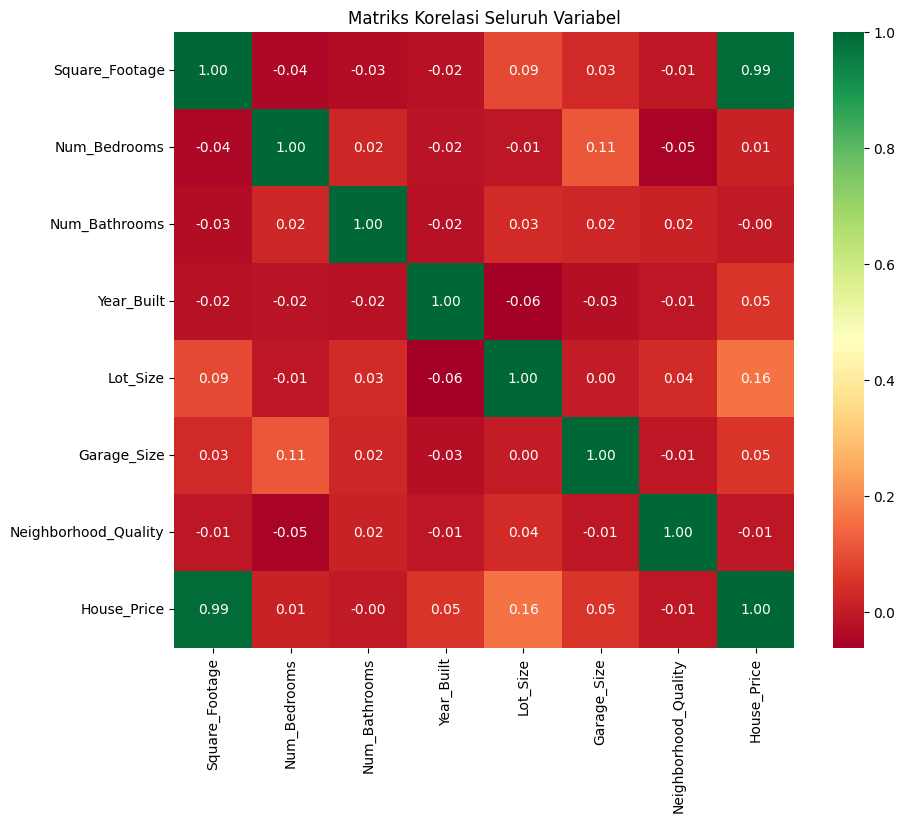

Korelasi House_Price (Y) dengan variabel lain
House_Price             1.000000
Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Num_Bathrooms          -0.001862
Neighborhood_Quality   -0.007770
Name: House_Price, dtype: float64


In [8]:
# Mengambil kolom numerik saja
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# histogram
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle("Distribusi Semua Variabel Independen & Target")
plt.tight_layout()
plt.show()

# correlation
plt.figure(figsize=(10, 8))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Matriks Korelasi Seluruh Variabel')
plt.show()
target_corr = correlation['House_Price'].sort_values(ascending=False)
print("Korelasi House_Price (Y) dengan variabel lain")
print(target_corr)

- Hasil analisis korelasi menunjukkan bahwa hanya satu variabel yang memiliki hubungan linear kuat dengan variabel target (House_Price) yaitu Square_Footage, sementara variabel lainnya cenderung memiliki hubungan non-linear atau bersyarat. Oleh karena itu, model Random Forest dipilih karena kemampuannya dalam menangkap hubungan non-linear dan interaksi antar variabel tanpa bergantung pada asumsi linearitas.
- Distribusi Num_Bedrooms, Num_Bathrooms, Garage_Size, dan Neighborhood_Quality menunjukkan variabel tersebut bersifat ordinal.
- House_Price (Y) beserta variabel kontinu X lainnya (Square_Footage dan Lot_Size) memiliki distribusi yang hampir merata dan tidak ada ekor panjang ke kanan yang ekstrem, sehingga tidak diperlukan transformasi.



# **5. Data Preprocessing**

In [9]:
# create file automate_Putri.py
automate_code = '''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
import os

def automate_preprocessing(input_path, output_folder=None):

    # 1. LOAD DATA
    df = pd.read_csv(input_path)

    # 2. HANDLE MISSING VALUES
    missing_rules = {
        'House_Price': 'drop',
        'Square_Footage': 'median',
        'Num_Bedrooms': 'mode',
        'Num_Bathrooms': 'mode',
        'Lot_Size': 'median',
        'Garage_Size': 'mode',
        'Year_Built': 'mode',
        'Neighborhood_Quality': 'mode'
    }

    for col, strategy in missing_rules.items():
        if col in df.columns and df[col].isnull().any():
            if strategy == 'drop':
                df = df.dropna(subset=[col])
            elif strategy == 'median':
                df[col] = df[col].fillna(df[col].median())
            elif strategy == 'mode':
                df[col] = df[col].fillna(df[col].mode[0])

    # 3. HAPUS DUPLIKAT
    df = df.drop_duplicates()

    # 4. FEATURE ENGINEERING
    df['House_Age'] = 2024 - df['Year_Built']
    df = df.drop('Year_Built', axis=1)

    # 5. OUTLIER HANDLING
    def cap_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return np.where(series > upper, upper,
                       np.where(series < lower, lower, series))

    outlier_cols = ['Square_Footage', 'Lot_Size', 'Garage_Size']
    for col in outlier_cols:
        if col in df.columns:
            df[col] = cap_outliers(df[col])

    # 6. STANDARDIZATION
    X = df.drop('House_Price', axis=1)
    y = df['House_Price']

    numeric_cols = X.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()

    X_scaled = X.copy()
    X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    df_scaled = pd.concat([X_scaled, y], axis=1)

    # 7. SIMPAN JIKA DIMINTA
    if output_folder:
        os.makedirs(output_folder, exist_ok=True)
        df.to_csv(f'{output_folder}/house_price_clean.csv', index=False)
        df_scaled.to_csv(f'{output_folder}/house_price_scaled.csv', index=False)
        joblib.dump(scaler, f'{output_folder}/scaler.pkl')

    return df, df_scaled, scaler

# BAGIAN UNTUK DI-RUN LANGSUNG
if __name__ == "__main__":
    # Default paths (sesuaikan)
    input_file = "Eksperimen_SML_Putri/house_price_raw/house_price_regression_dataset.csv"
    output_dir = "Eksperimen_SML_Putri/preprocessing/house_price_preprocessing"

    df_clean, df_scaled, scaler = automate_preprocessing(input_file, output_dir)
'''

# SIMPAN KE FILE
with open('Eksperimen_SML_Putri/preprocessing/automate_Putri.py', 'w') as f:
    f.write(automate_code)


In [10]:
!python Eksperimen_SML_Putri/preprocessing/automate_Putri.py